In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix1.csv")
df.shape

(8790, 10)

In [3]:
cat_col = [d for d in df.columns if df[d].dtype == 'object']
num_col = [d for d in df.columns if df[d].dtype != 'object']

In [4]:
num_col
cat_col

['show_id',
 'type',
 'title',
 'director',
 'country',
 'date_added',
 'rating',
 'duration',
 'listed_in']

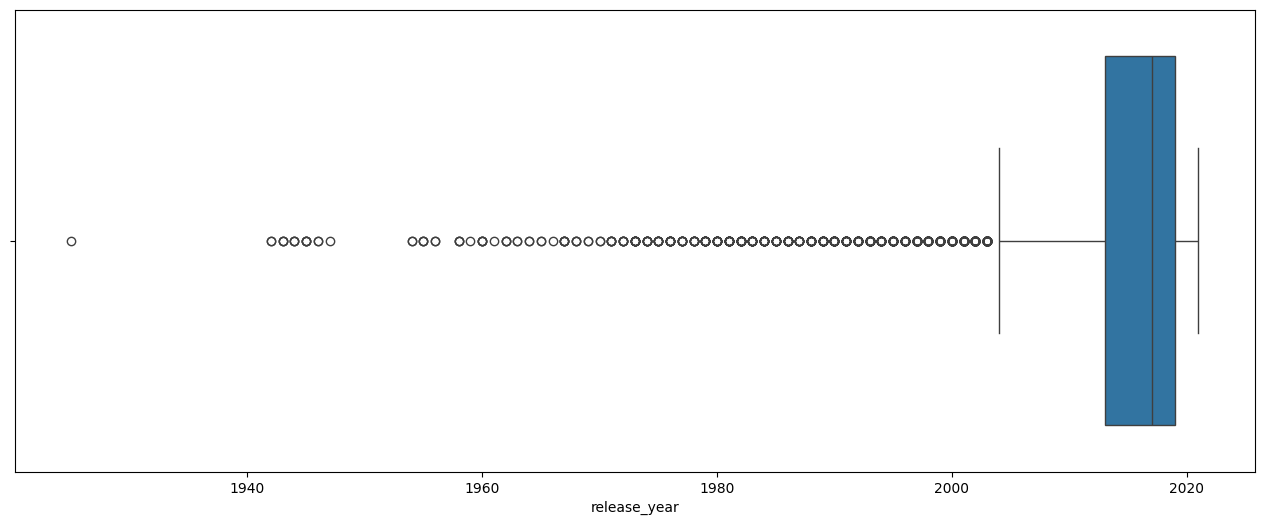

In [5]:
import seaborn as sns
for col in num_col:
    plt.figure(figsize=(16,6))
    sns.boxplot(x=df[col])
    plt.show()


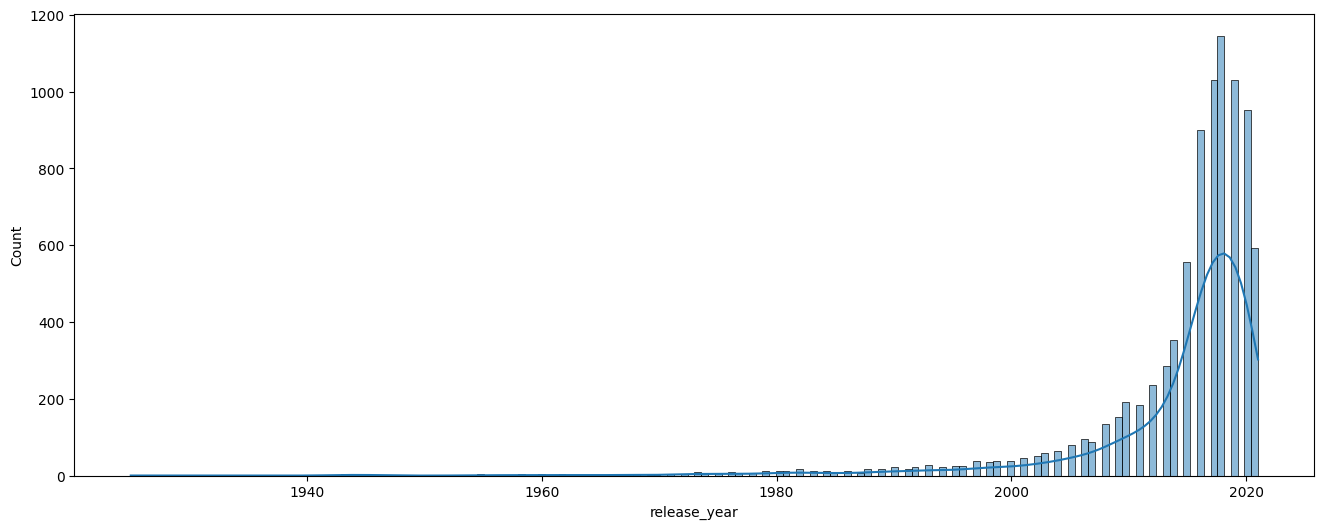

In [6]:
for col in num_col:
    plt.figure(figsize=(16,6))
    sns.histplot(df[col], kde=True)
    plt.show()

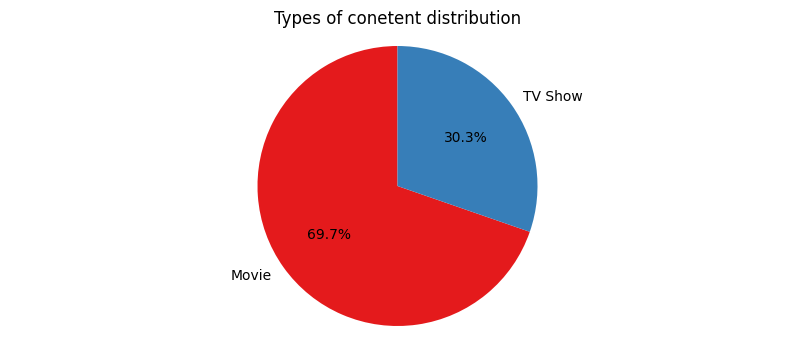

In [7]:
type_counts = df.type.value_counts()
type_counts
plt.figure(figsize=(10,4))
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title("Types of conetent distribution")
plt.axis('equal')
plt.show()

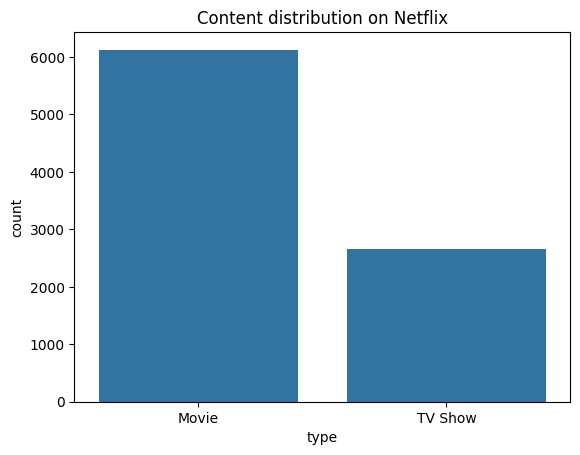

In [8]:
sns.countplot(data=df, x="type")
plt.title("Content distribution on Netflix")
plt.show()

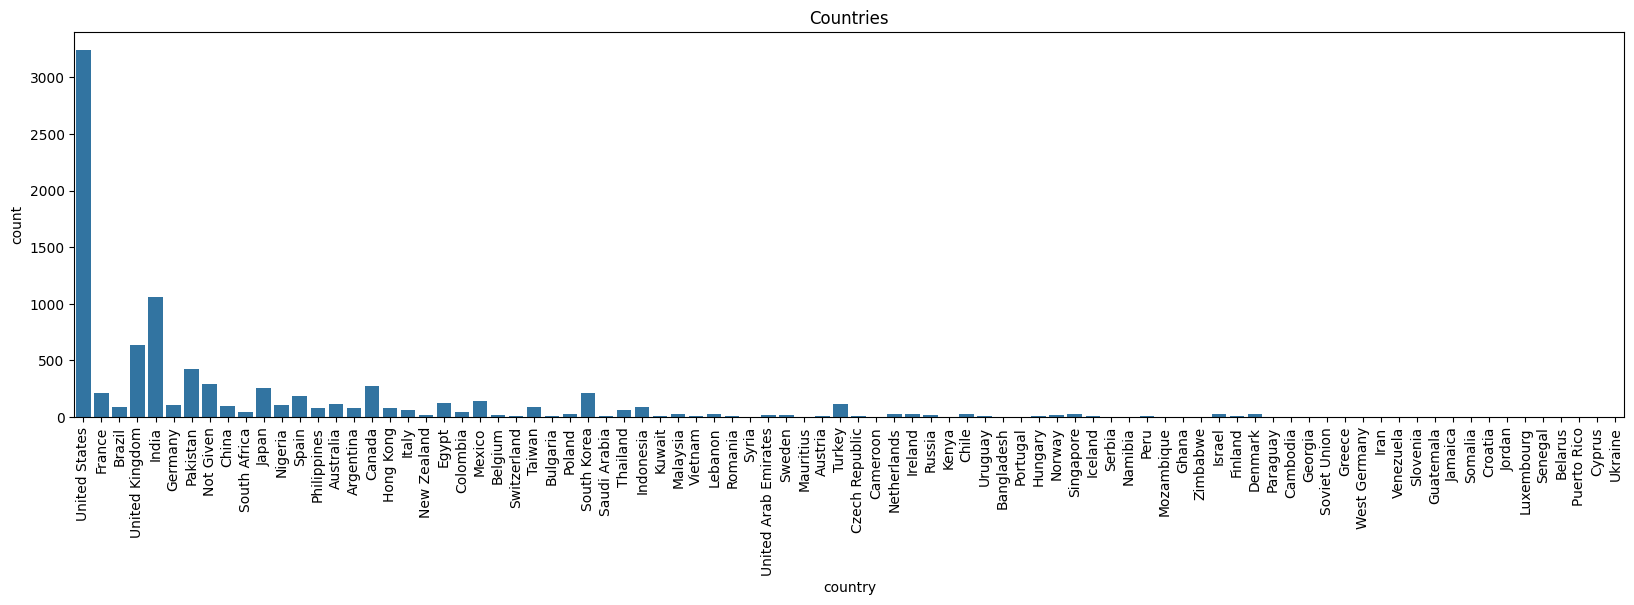

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x = "country")
plt.title("Countries")
plt.xticks(rotation=90)
plt.show()

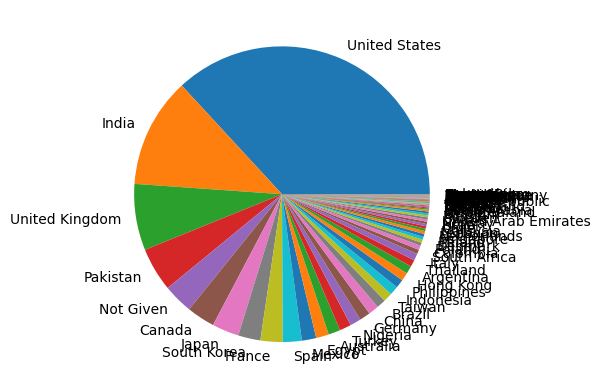

In [10]:
country_count = df.country.value_counts()
plt.pie(country_count, labels=country_count.index)
plt.xticks(rotation=90)
plt.show()

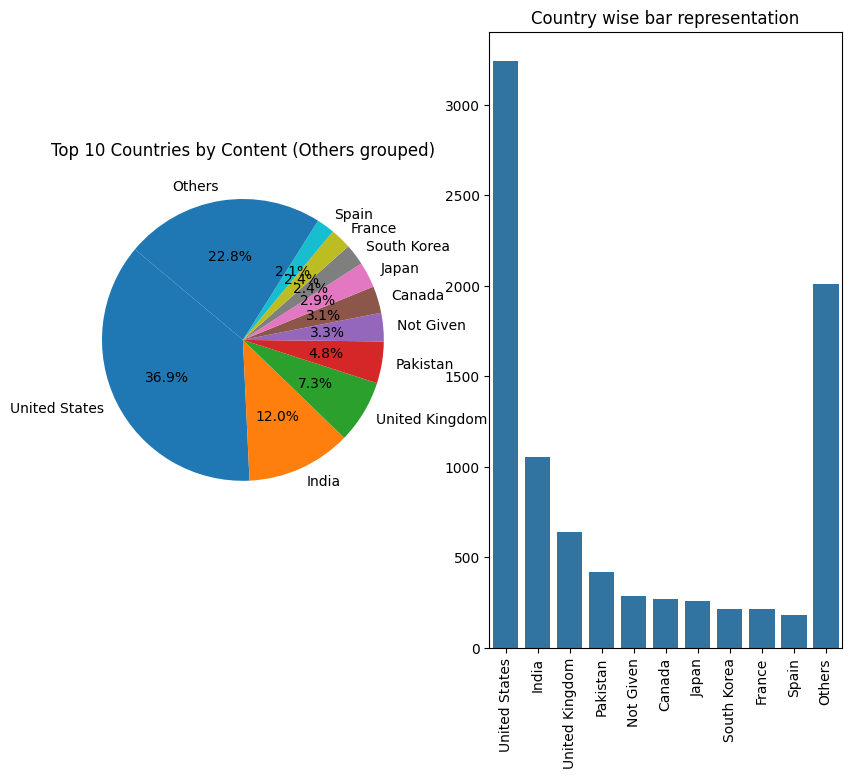

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

top_n = 10
country_count = df['country'].value_counts()

# Top 10 + Others
top_countries = country_count[:top_n]
others = country_count[top_n:].sum()
final_count = pd.concat([top_countries, pd.Series({'Others': others})])

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.pie(final_count, labels=final_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries by Content (Others grouped)')

plt.subplot(1,2,2)
sns.barplot(data=final_count)
plt.xticks(rotation=90)
plt.title("Country wise bar representation")

plt.show()

# final_count



C:\Users\cheta\AppData\Local\Temp\ipykernel_23172\2075434378.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


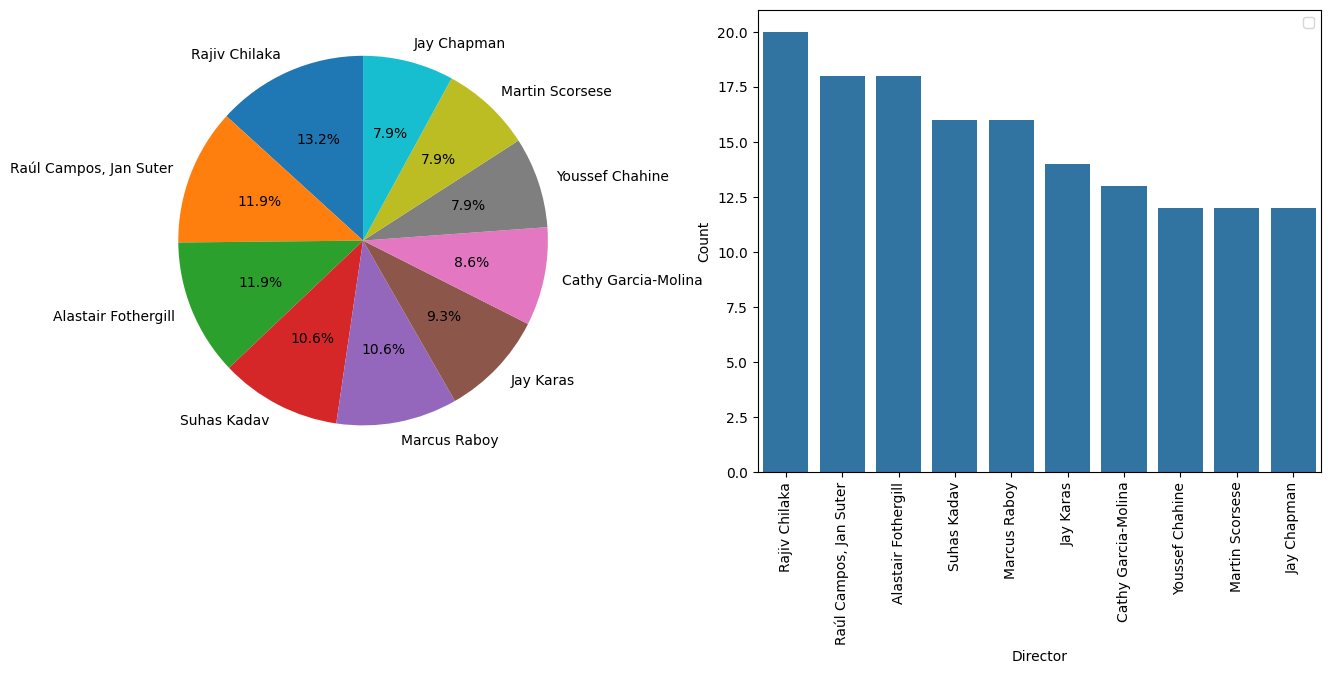

director
Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Name: count, dtype: int64

In [12]:
df_filtered = df[df['director'].str.lower() != 'not given']
dir_count = df_filtered.director.value_counts()
top_dir = dir_count[:top_n]
# others = dir_count[top_n:].sum()
# final_dir = pd.concat([top_dir,pd.Series({"Others":others})])
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.pie(top_dir,labels=top_dir.index, autopct="%1.1f%%", startangle=90)

plt.subplot(1,2,2)
sns.barplot(top_dir)
plt.xticks(rotation=90)
plt.xlabel("Director")
plt.ylabel("Count")
plt.legend()
plt.show()
top_dir

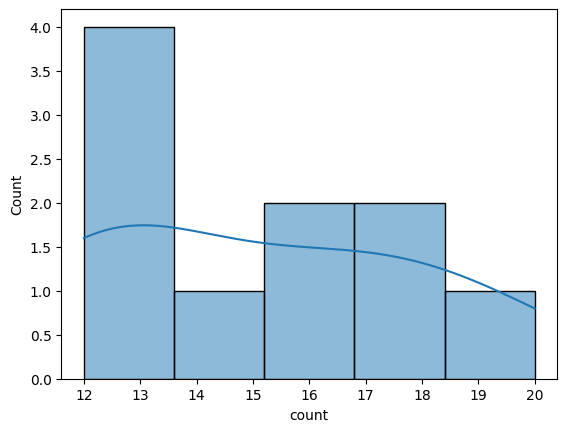

In [13]:
sns.histplot(top_dir, kde=True)
plt.show()

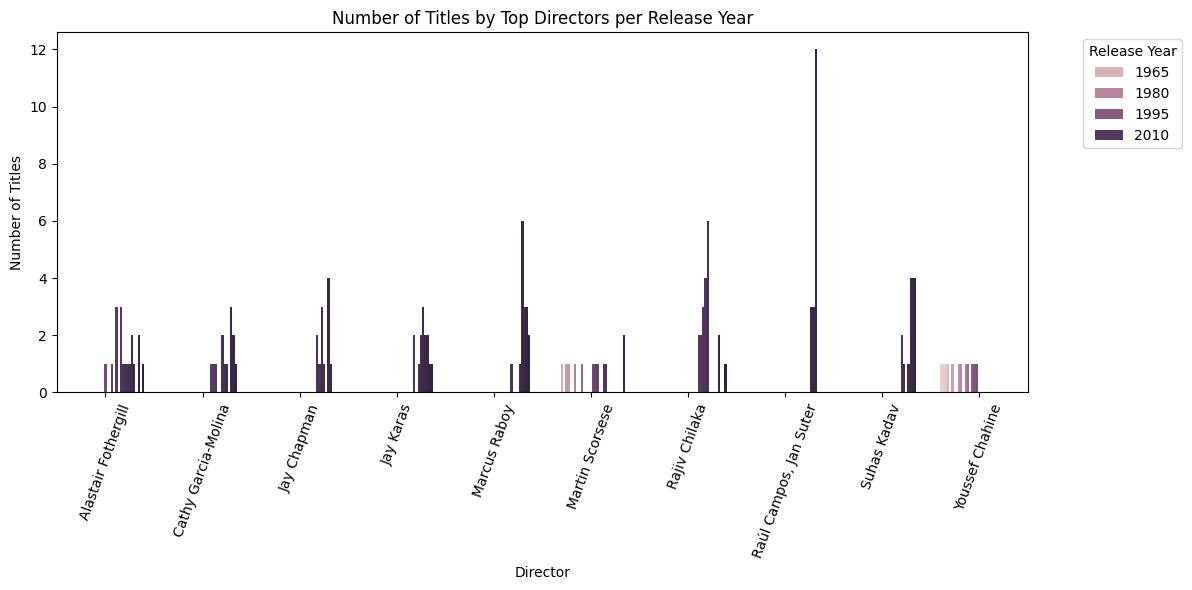

,director,release_year,count
0,Alastair Fothergill,2001,1
1,Alastair Fothergill,2006,1
2,Alastair Fothergill,2009,3
3,Alastair Fothergill,2011,3
4,Alastair Fothergill,2012,1
...,...,...,...
75,Youssef Chahine,1982,1
76,Youssef Chahine,1989,1
77,Youssef Chahine,1994,1
78,Youssef Chahine,1997,1


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = df[df['director'].str.lower() != "not given"]
top_directors = filtered_df['director'].value_counts().head(10).index
top_df = filtered_df[filtered_df['director'].isin(top_directors)]
grouped = top_df.groupby(['director', 'release_year']).size().reset_index(name='count')


plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='director', y='count', hue='release_year')
plt.xticks(rotation=70)
plt.title("Number of Titles by Top Directors per Release Year")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.legend(title="Release Year",  bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()
plt.show()
grouped


In [16]:
import numpy as np

print(num_col)
outlier_percentage = {}

for col in num_col:
    col_data = df[col]
    q1 = np.percentile(col_data, 25)
    q3 = np.percentile(col_data, 75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    # Boolean mask for outliers
    outliers_mask = (col_data < lower) | (col_data > upper)
    outlier_count = outliers_mask.sum()
    outlier_percentage[col] = (outlier_count / len(col_data)) * 100

    print(f"Count of outliers in column '{col}': {outlier_count}")
    print(f"Percentage of outliers in column '{col}': {outlier_percentage[col]:.2f}%")
    print(f"Lower bound: {lower}")
    print(f"Upper bound: {upper}")
    print(f"Outlier data:\n{col_data[outliers_mask].values}")
    print("\n==============================================\n")


['release_year']
Count of outliers in column 'release_year': 717
Percentage of outliers in column 'release_year': 8.16%
Lower bound: 2004.0
Upper bound: 2028.0
Outlier data:
[1993 1998 1997 1996 1975 1978 1983 1987 2001 2002 2002 2003 2001 1994
 2003 1982 1994 1993 2003 2001 1989 1990 1991 1994 1998 1999 1986 2003
 1996 2003 1999 1984 2001 1997 2003 2003 1980 1986 1961 1996 2000 1993
 2003 2001 2003 1995 1993 1985 1993 1925 1995 1992 1993 2002 1999 1986
 1999 1995 1991 1994 2003 2000 1991 1995 2000 1991 1999 1983 1996 1976
 1959 1997 2002 1997 1999 1997 2000 1995 1993 1988 1995 2001 1992 2000
 1999 1997 1984 1986 1989 2003 1980 2002 2003 1998 1998 2003 1988 1981
 1982 1981 1972 2001 2000 1997 2003 2001 1997 2001 1997 1984 2001 1981
 1996 1976 1998 1999 1989 2003 1994 2002 2000 1992 2001 1992 2001 1981
 2001 1996 1964 2002 1999 1998 1990 1988 2002 1997 2003 1999 1987 1997
 1988 1993 1990 1954 1989 1994 1975 1991 2003 1982 1999 1980 1990 1982
 2002 2002 2003 1999 2002 1998 1998 1999 1990

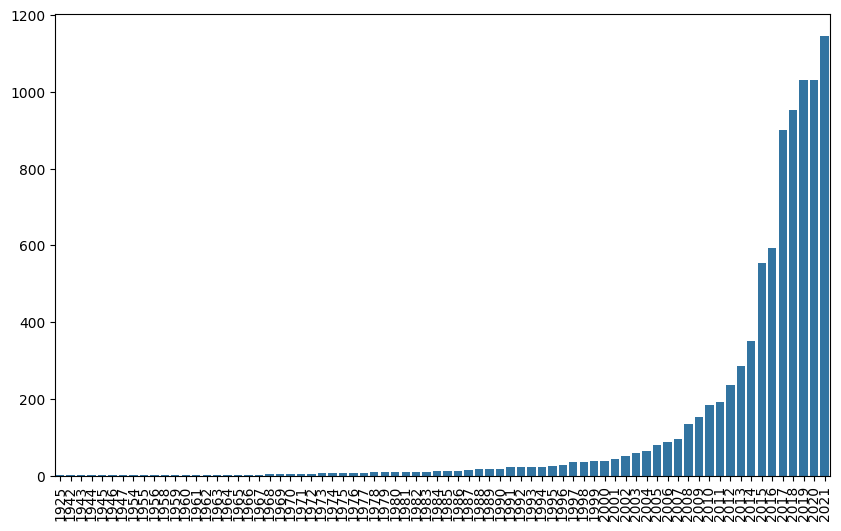

In [35]:
df.describe()
year_dict = {}
for d in df.release_year:
    if d in year_dict:
        year_dict[d]+=1
    else:
        year_dict[d] = 1
sorted_years = sorted(year_dict.keys())
sorted_count = sorted(year_dict[year] for year in sorted_years)
year_df = pd.DataFrame(list(year_dict.items()), columns=['Year', 'Count'])

plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x=sorted_years,y= sorted_count,data=year_df)
plt.show()